In [17]:
# --- a. Import the necessary packages ---

import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [63]:
def load_and_preprocess_data(filepath, num_classes=10):
 
    # 1. Load the dataset
    print(f"Loading data from: {filepath}...")
    data = pd.read_csv(filepath)

    # 2. Separate features (pixels) and target (label)
    #X = data.iloc[:, 1:].values.astype('float32') # Pixel data starts from the second column
    #y = data['label'].values

    X=data.drop('label',axis=1).values.astype('float32')
    y=data['label'].values.astype('float32')
    
    # 3. Normalise the pixel data: Scale to the range [0, 1]
    # MNIST pixels are 0 to 255 (unsigned 8-bit integers)
    X /= 255.0

    # 4. One-hot encode the target labels (e.g., 5 -> [0, 0, 0, 0, 0, 1, 0, 0, 0, 0])
    y = to_categorical(y, num_classes=num_classes)

    return X, y

In [65]:
# Load the training and testing data

X_train, y_train = load_and_preprocess_data('/Users/shravaninomulwar/Desktop/abc/dataset/MNIST(Ass2&3)/mnist_train.csv')
X_test, y_test = load_and_preprocess_data('/Users/shravaninomulwar/Desktop/abc/dataset/MNIST(Ass2&3)/mnist_test.csv')

Loading data from: /Users/shravaninomulwar/Desktop/abc/dataset/MNIST(Ass2&3)/mnist_train.csv...
Loading data from: /Users/shravaninomulwar/Desktop/abc/dataset/MNIST(Ass2&3)/mnist_test.csv...


In [35]:
X_test[:10]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [37]:
# --- c. Define the network architecture using Keras ---

# The MNIST image is 28x28 = 784 pixels.
# The Sequential model defines a linear stack of layers.

model = Sequential([
    # Input layer: Flattens the 784-element feature vector
    Flatten(input_shape=(784,)),

    # First Hidden Layer: A fully-connected layer with 512 neurons and ReLU activation
    Dense(512, activation='relu', name='Hidden_Layer_1'),

    # Second Hidden Layer: A fully-connected layer with 256 neurons and ReLU activation
    Dense(256, activation='relu', name='Hidden_Layer_2'),

    # Output Layer: 10 neurons (for digits 0-9) and Softmax for classification probability
    Dense(10, activation='softmax', name='Output_Layer')
])

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [39]:
# Compile the model
# We use categorical crossentropy because the labels are one-hot encoded

model.compile(
    optimizer=SGD(learning_rate=0.01),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Display the model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_Layer_1 (Dense)          │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_Layer_2 (Dense)          │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_Layer (Dense)            │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 535,818 (2.04 MB)

 Trainable params: 535,818 (2.04 MB)

 Non-trainable params: 0 (0.00 B)

In [73]:
# --- d. Train the model using SGD with 11 epochs ---

print("\nStarting model training...")
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=3,  # Train for 11 epochs as requested
    batch_size=128,
    #verbose=1
)
print("Model training complete.")


Starting model training...
Epoch 1/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9523 - loss: 0.1677 - val_accuracy: 0.9503 - val_loss: 0.1667
Epoch 2/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9540 - loss: 0.1604 - val_accuracy: 0.9528 - val_loss: 0.1608
Epoch 3/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9548 - loss: 0.1590 - val_accuracy: 0.9543 - val_loss: 0.1561
Model training complete.


In [51]:
# --- e. Evaluate the network ---

loss, accuracy = model.evaluate(X_test, y_test, verbose=0)

print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {100 * accuracy:.2f}%")

Test Loss: 0.1888
Test Accuracy: 94.46%


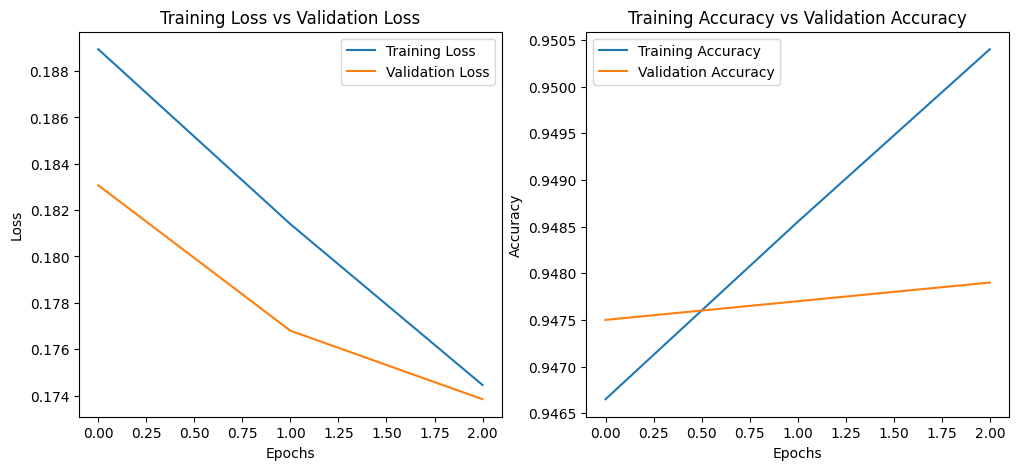

In [71]:
plt.figure(figsize=(12,5))

# Plot Loss
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training Loss vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot Accuracy
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training Accuracy vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()
